In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system..')
    
import numpy as np


import plotly_express as px
import seaborn as sns
import glob

In [2]:
# 데이터 불러오기 (Player 폴더 안의 *_data.xlsx 형식의 파일 모두 불러오기)
data = glob.glob('data/Player/*_data.xlsx')

print(data)

data_df = []

for filename in data:
    df = pd.read_excel(filename)
    data_df.append(df)

df = pd.concat(data_df)
df.reset_index(drop = True, inplace = True)
df

['data/Player\\Arrow_data.xlsx', 'data/Player\\Bang_data.xlsx', 'data/Player\\Bjergsen_data.xlsx', 'data/Player\\Cuvee_data.xlsx', 'data/Player\\Dade_data.xlsx', 'data/Player\\deft_data.xlsx', 'data/Player\\Doublelift_data.xlsx', 'data/Player\\Faker_data.xlsx', 'data/Player\\fly_data.xlsx', 'data/Player\\Impact_data.xlsx', 'data/Player\\Imp_data.xlsx', 'data/Player\\Khan_data.xlsx', 'data/Player\\Marin_data.xlsx', 'data/Player\\Pawn_data.xlsx', 'data/Player\\Piglet_data.xlsx', 'data/Player\\Pray_data.xlsx', 'data/Player\\Rekkles_data.xlsx', 'data/Player\\Rookie_data.xlsx', 'data/Player\\Shy_data.xlsx', 'data/Player\\Smeb_data.xlsx', 'data/Player\\Uzi_data.xlsx']


,Year,Team,Pos,GP,W%,KDA,KP%,DTH%,GD10,XPD10,CSPM,DPM,DMG%,GOLD%,WPM,WCPM,age
0,2021,Wildcard Gaming Red,ADC,36,78,6.3,59.4,15.9,380.0,232.0,8.2,596.0,25.6,23.5,0.51,0.30,27
1,2021,Wildcard Gaming Red,Middle,1,0,1.8,57.9,27.3,552.0,-324.0,7.3,540.0,26.9,27.6,0.72,0.12,27
2,2019,OpTic Gaming,ADC,36,42,4.1,66.0,12.8,2.0,-22.0,9.2,483.0,27.9,26.3,0.47,0.41,25
3,2019,OpTic Gaming Academy,ADC,2,50,22.0,81.5,6.7,-35.0,-35.0,8.4,623.0,34.8,26.8,0.46,0.22,25
4,2018,OpTic Gaming,ADC,36,39,4.0,69.5,14.2,-83.0,-51.0,9.0,476.0,26.3,24.7,0.50,0.47,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,2015,Oh My God,ADC,90,52,3.5,71.5,19.9,NaN,NaN,NaN,NaN,NaN,29.5,NaN,NaN,18
222,2014,Royal Club,ADC,84,57,4.3,71.0,18.1,239.0,22.0,9.8,579.0,31.8,28.0,0.18,0.19,17
223,2014,Royal Club,Middle,12,25,3.3,74.7,17.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
224,2013,Royal Club,ADC,71,59,4.9,69.7,16.8,NaN,NaN,NaN,NaN,NaN,29.9,NaN,NaN,16


In [27]:
# 16세, 26세, 27세는 표본이 적다
df['age'].value_counts()

23    29
19    28
22    28
18    23
20    22
21    22
24    22
25    19
17    17
26     6
27     6
16     4
Name: age, dtype: int64

In [3]:
# 나이대별 스탯을 추출하기 위해 groupby와 .mean() 사용
df_avg = df.groupby(df['age']).mean()
del df_avg['Year']
df_avg

,GP,W%,KDA,KP%,DTH%,GD10,XPD10,CSPM,DPM,DMG%,GOLD%,WPM,WCPM
age,,,,,,,,,,,,,
16,23.250000,42.000000,4.350000,71.075000,15.400000,NaN,NaN,NaN,NaN,NaN,29.900000,NaN,NaN
17,21.764706,51.235294,4.794118,69.876471,17.576471,239.000000,22.000000,9.800000,579.000000,31.800000,26.675000,0.180000,0.190000
18,37.652174,56.826087,4.486957,67.991304,19.069565,72.600000,94.000000,8.640000,567.600000,31.120000,23.917647,0.362000,0.132000
19,47.642857,56.428571,4.467857,68.242857,19.607143,139.909091,53.272727,8.841667,587.769231,30.076923,24.845833,0.332308,0.176923
20,75.181818,59.318182,4.422727,68.877273,19.459091,61.692308,24.230769,8.671429,566.142857,27.485714,24.194444,0.419286,0.202143
21,94.590909,59.454545,4.540909,68.659091,18.777273,58.500000,52.500000,8.795000,527.150000,27.105000,23.961905,0.419500,0.216000
22,61.107143,52.107143,4.007143,68.014286,18.914286,49.086957,54.565217,9.116000,542.840000,27.860000,24.396296,0.478000,0.258800
23,52.172414,53.517241,3.975862,64.493103,18.755172,25.680000,58.040000,8.908000,491.720000,26.864000,23.862963,0.503600,0.274000
24,67.727273,49.000000,4.031818,65.790909,17.954545,47.727273,8.090909,8.718182,498.909091,26.600000,24.372727,0.498636,0.276364


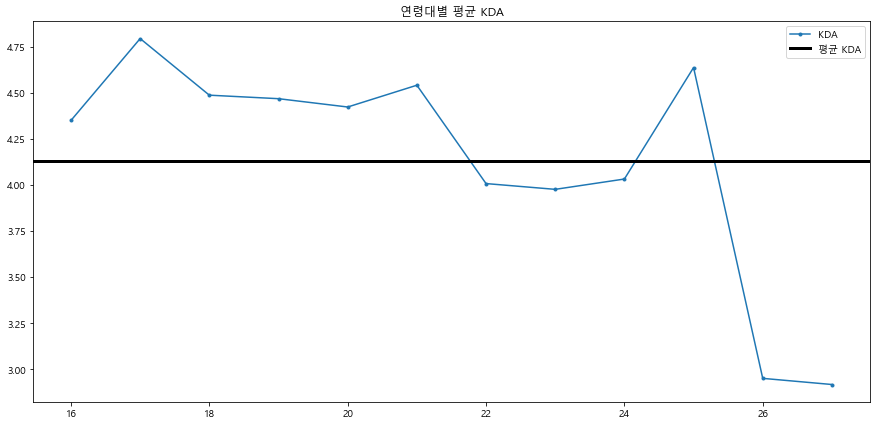

In [28]:
# 눈에 띄는 변화가 없어서 사용하지 않아도 될 것 같아요
plt.figure(figsize=(15,7))

plt.plot(df_avg.index, df_avg['KDA'], marker='.', label='KDA')
plt.axhline(y=df_avg['KDA'].mean() ,color='black',label='평균 KDA',linewidth=3)

plt.legend()
plt.title('연령대별 평균 KDA')
plt.show()

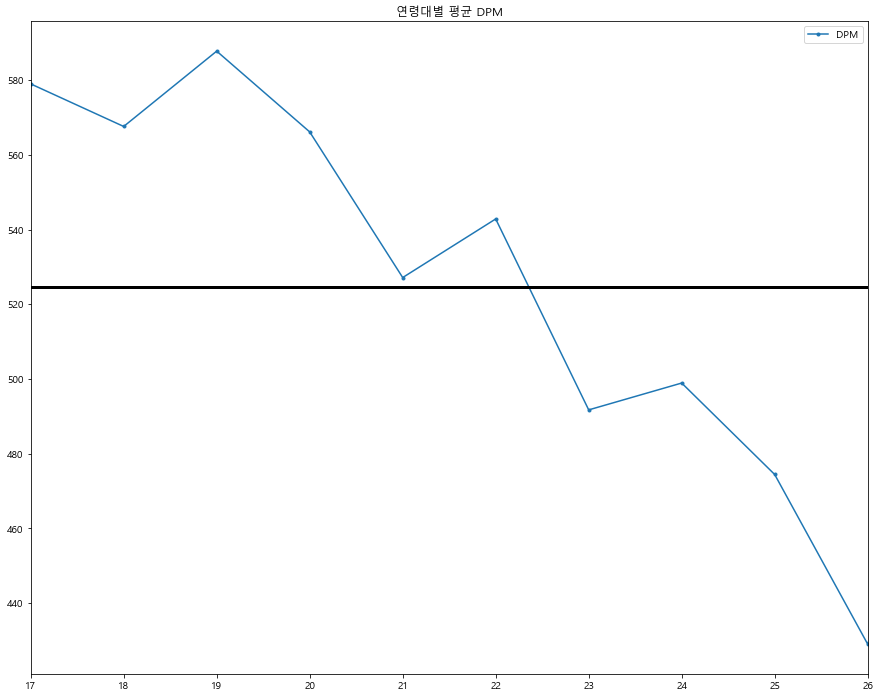

In [18]:
plt.figure(figsize=(15,12))

plt.plot(df_avg.index, df_avg['DPM'], marker='.', label='DPM')

plt.legend()
plt.xlim(17, 26)
plt.axhline(y=df_avg['DPM'].mean() ,color='black',label='평균 DPM',linewidth=3)
plt.title('연령대별 평균 DPM')
plt.show()

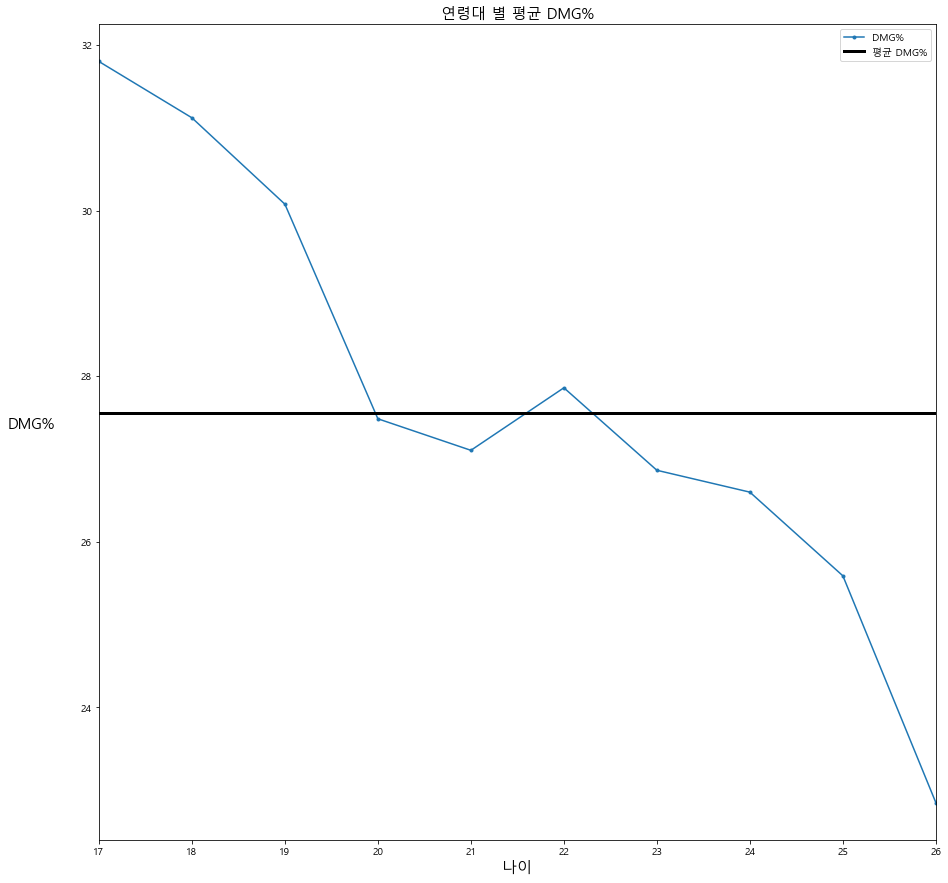

In [17]:
plt.figure(figsize=(15,15))

plt.plot(df_avg.index, df_avg['DMG%'], marker='.', label='DMG%')


plt.xlabel('나이', fontsize = 15)
plt.xlim(17, 26)
plt.ylabel('DMG%', rotation=360 , labelpad = 50, fontsize = 15)
plt.axhline(y=df_avg['DMG%'].mean() ,color='black',label='평균 DMG%',linewidth=3)
plt.legend()
plt.title('연령대 별 평균 DMG%', fontsize = 15)
plt.show()

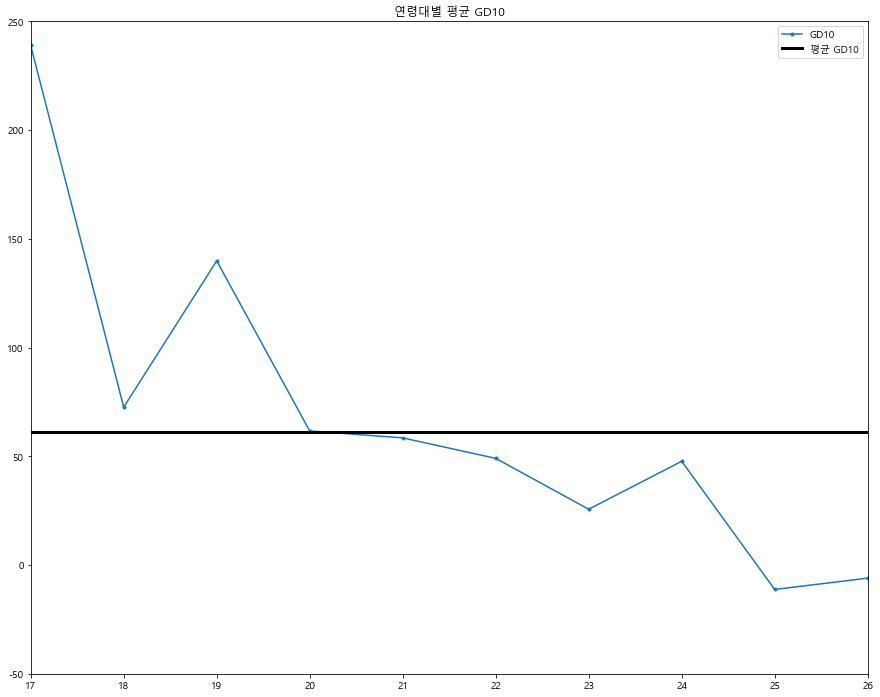

In [20]:
plt.figure(figsize=(15,12))

plt.plot(df_avg.index, df_avg['GD10'], marker='.', label='GD10')
plt.axhline(y=df_avg['GD10'].mean() ,color='black',label='평균 GD10',linewidth=3)


plt.legend()
plt.xlim(17, 26)
plt.ylim(-50, 250)
plt.title('연령대별 평균 GD10')
plt.show()